In [209]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
%matplotlib inline

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

In [210]:
df = Database()
df.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
0,"(2E)-but-2-ene-1,4-diol",Alcohols,401.15,NaN,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(2R,3R,4R,5S)-hexane-1,2,3,4,5,6-hexol",Alcohols,422.00,NaN,14,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(2S)-butane-1,2,4-triol",Alcohols,385.00,NaN,10,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(2Z)-but-2-ene-1,4-diol",Alcohols,401.15,NaN,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(9Z,12Z,15Z)-octadeca-9,12,15-trien-1-ol",Alcohols,NaN,41.0,32,1,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
df = df.groupby('Family')

In [249]:
df.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
0,"(2E)-but-2-ene-1,4-diol",Alcohols,401.15,NaN,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(2R,3R,4R,5S)-hexane-1,2,3,4,5,6-hexol",Alcohols,422.00,NaN,14,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(2S)-butane-1,2,4-triol",Alcohols,385.00,NaN,10,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(2Z)-but-2-ene-1,4-diol",Alcohols,401.15,NaN,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(9Z,12Z,15Z)-octadeca-9,12,15-trien-1-ol",Alcohols,NaN,41.0,32,1,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,(1-methylheptyl)benzene,Aromatics,373.00,NaN,22,2,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
137,(1E)-prop-1-en-1-ylbenzene,Aromatics,325.15,NaN,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,(1Z)-prop-1-enylbenzene,Aromatics,311.00,NaN,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,(2-methylbutyl)benzene,Aromatics,337.00,NaN,16,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
140,"(2,2-dimethylpropyl)benzene",Aromatics,323.00,NaN,16,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## data clean

In [234]:
train, test = train_test_split(df, test_size=0.1)

In [235]:
X = df.loc[:, '-H': 'aaCa']
y, labels=pd.factorize(df.Family)

X_train = train.loc[:, '-H': 'aaCa']
y_train, y_train_labels = pd.factorize(train.Family)

X_test = test.loc[:, '-H': 'aaCa']
y_test, y_test_labels = pd.factorize(test.Family)

In [259]:
family={}
for i in range(len(labels)):
    family[i]=labels[i]
print(family)

{0: 'Alcohols', 1: 'Aromatics', 2: 'Aromatics (Oxygenates)', 3: 'Cyclic (Oxygenates)', 4: 'Esters', 5: 'Naphtenes', 6: 'Olefins', 7: 'Paraffins'}


In [263]:
y_pred[1]

0

In [236]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [237]:
y_pred

array([4, 0, 3, 0, 0, 3, 6, 3, 0, 4, 5, 0, 4, 4, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 3, 5, 0, 3, 0, 3, 0, 3, 1, 0, 0, 1, 3, 3, 3, 0, 0,
       1, 0, 3, 3, 3, 3, 0, 6, 3, 0, 2, 4, 0, 1, 2, 2, 0, 1, 0, 3, 3, 5, 0,
       3, 0, 4, 3, 2, 4, 3, 0, 5, 0, 4, 3, 0, 1, 0, 0, 5, 1, 3, 3, 0, 0, 2,
       3, 0, 0, 0, 3, 4, 4, 2, 1, 3, 3, 0, 2, 3, 4, 0, 0, 5, 0, 2, 0, 0, 7,
       4], dtype=int64)

In [238]:
y_test

array([0, 1, 2, 3, 1, 2, 4, 2, 3, 4, 5, 1, 0, 0, 6, 6, 6, 6, 6, 5, 1, 1, 1,
       3, 3, 1, 6, 1, 3, 2, 5, 1, 2, 1, 2, 6, 2, 6, 1, 1, 6, 2, 2, 1, 2, 1,
       6, 1, 2, 2, 2, 2, 1, 0, 2, 3, 1, 0, 1, 6, 3, 3, 1, 6, 1, 2, 2, 5, 3,
       2, 1, 0, 2, 3, 0, 2, 2, 5, 1, 0, 2, 1, 6, 1, 1, 5, 6, 2, 2, 2, 6, 3,
       2, 1, 1, 3, 2, 0, 0, 3, 6, 2, 2, 2, 1, 2, 0, 1, 1, 5, 0, 3, 1, 3, 5,
       0], dtype=int64)

In [239]:
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.068965517241379309

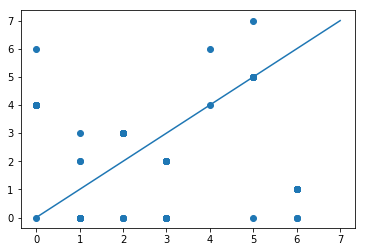

In [240]:
plt.scatter(y_test, y_pred)
plt.plot([0,7],[0,7])

### define functions

In [288]:
def family_labels (labels):
    family={}
    for i in range(len(labels)):
        family[i]=labels[i]
    return family

In [241]:
def choose_k(X_train, y_train, X_test, y_test, list_of_k):
    dic = {}
    for k in list_of_k:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accu = metrics.accuracy_score(y_test, y_pred)
        dic['k value: %s, accuracy' % k] = accu
    return dic

In [243]:
k=[1,2,3,4,5]
choose_k(X_train, y_train, X_test, y_test, k)

{'k value: 1, accuracy': 0.060344827586206899,
 'k value: 2, accuracy': 0.060344827586206899,
 'k value: 3, accuracy': 0.068965517241379309,
 'k value: 4, accuracy': 0.068965517241379309,
 'k value: 5, accuracy': 0.068965517241379309}

In [285]:
def predict_family (X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    result = pd.DataFrame()
    for i in range(len(y_pred)):
        result.loc[i, 'Family']=family[y_pred[i]]
    return result

In [286]:
predict_family (X_train, y_train, X_test, 4)

,Family
0,Esters
1,Alcohols
2,Cyclic (Oxygenates)
3,Alcohols
4,Alcohols
5,Cyclic (Oxygenates)
6,Olefins
7,Cyclic (Oxygenates)
8,Alcohols
9,Esters


## reminder

In [81]:
df = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
df = df.rename(index=str, columns={"Unnamed: 0": "name", 
                                   "Unnamed: 1": "family", 
                                   "Unnamed: 2": "SMILES", 
                                   "Unnamed: 3": "FP_set", 
                                   "Unnamed: 4": "FP_exp", 
                                   "Unnamed: 5": "FP_calc", 
                                   "Unnamed: 6": "FP_std", 
                                   "Unnamed: 7": "CN_set", 
                                   "Unnamed: 8": "CN_exp", 
                                   "Unnamed: 9": "CN_calc", 
                                   "Unnamed: 10": "CN_std", })
